# Digit Recognizer 

data set: https://www.kaggle.com/c/digit-recognizer

this is the hello world problem in computer vision. In this note book I'm trying to get a sense of how different architectures of fully connected neural networks will result and see what works better than the others.

I'm using Keras to build the models
I'm using TensorFlow, gpu-based, as backend for Keras


In [1]:

import numpy as np
from keras import layers
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense ,Input, Dropout, InputLayer
from keras.utils import to_categorical
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
from keras.models import load_model as keras_load_model
import os
from dl_utils import utils

Using TensorFlow backend.


### Parameters

In [2]:
numOfClasses = 10
input_dim = 28 * 28
directory = "./keras_models/"
# hyper parameters
batch = 32
epoch = 20


### Labeled Training Set

In [3]:
trainWithLabel = np.genfromtxt('train.csv', delimiter=",", skip_header=1)

In [4]:
X_train = trainWithLabel[0:32000, 1:]
X_test = trainWithLabel[32000:42000, 1:]

# this step really makes a difference in how fast the learning converges to higher accuracy
# accuracy increased 4-5% for each model 
# normalize (mean 0, stdv 1) 
X_train = X_train / 255.0
print(X_train)
X_test = X_test / 255.0

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
print(X_train.shape)
print(X_test.shape)
print(X_train[0].shape)

(32000, 784)
(10000, 784)
(784,)


In [6]:
y_train = trainWithLabel[0:32000, 0] 
y_test = trainWithLabel[32000:42000, 0]

In [7]:
print(y_train.shape)
print(y_test.shape)

(32000,)
(10000,)


In [8]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print(Y_train.shape)
print(str(y_train[5243]) + "=" + str(Y_train[5243]))

print(Y_test.shape)
print(str(y_test[323]) + "=" + str(Y_test[323]))

(32000, 10)
3.0=[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
(10000, 10)
1.0=[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


<h3> train the models and save them to files </h3>

In [9]:
def save_model(model, file_name):
    model.save(directory + file_name + '.h5') 
    
def load_model(file_name):
    return keras_load_model(directory + file_name + '.h5')
    

In [10]:
def simpleNN_12x8x10():
    # Define the input as a tensor with shape input_shape
    model = Sequential()
    model.add(Dense(12, input_dim=input_dim, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(numOfClasses, activation='softmax'))
    return model

In [ ]:
# m_simpleNN_12x8x10 = simpleNN_12x8x10()
# m_simpleNN_12x8x10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# print(m_simpleNN_12x8x10.summary())
# m_simpleNN_12x8x10.fit(X_train, Y_train, epochs = epoch, batch_size = batch)
# save_model(m_simpleNN_12x8x10, 'simpleNN_12x8x10')

In [108]:
def simpleNN_24x12x6x10():
    # Define the input as a tensor with shape input_shape
    model = Sequential()
    model.add(Dense(24, input_dim=input_dim, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(numOfClasses, activation='softmax'))
    return model

In [109]:
# m_simpleNN_24x12x6x10 = simpleNN_24x12x6x10()
# m_simpleNN_24x12x6x10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# print(m_simpleNN_24x12x6x10.summary())
# m_simpleNN_24x12x6x10.fit(X_train, Y_train, epochs = epoch, batch_size = batch)
# save_model(m_simpleNN_24x12x6x10, 'simpleNN_24x12x6x10')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 24)                18840     
_________________________________________________________________
dense_48 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_49 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_50 (Dense)             (None, 10)                70        
Total params: 19,288
Trainable params: 19,288
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
32000/32000 [==============================] - 7s 205us/step - loss: 0.7536 - acc: 0.7621
Epoch 2/20
32000/32000 [==============================] - 5s 149us/step - loss: 0.3252 - acc: 0.9077
Epoch 3/20
32000/32000 [==============================] - 5s 16

In [110]:
def simpleNN_48x24x10():
    # Define the input as a tensor with shape input_shape
    model = Sequential()
    model.add(Dense(48, input_dim=input_dim, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(numOfClasses, activation='softmax'))
    return model

In [123]:
# m_simpleNN_48x24x10 = simpleNN_48x24x10()
# m_simpleNN_48x24x10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# print(m_simpleNN_48x24x10.summary())
# m_simpleNN_48x24x10.fit(X_train, Y_train, epochs = epoch, batch_size = batch)
# save_model(m_simpleNN_48x24x10, 'simpleNN_48x24x10')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 48)                37680     
_________________________________________________________________
dense_75 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_76 (Dense)             (None, 10)                250       
Total params: 39,106
Trainable params: 39,106
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
32000/32000 [==============================] - 7s 230us/step - loss: 0.4259 - acc: 0.8752
Epoch 2/20
32000/32000 [==============================] - 5s 168us/step - loss: 0.1918 - acc: 0.9433
Epoch 3/20
32000/32000 [==============================] - 5s 159us/step - loss: 0.1440 - acc: 0.9567
Epoch 4/20
32000/32000 [==============================] - 6s 176us/step - loss: 0.1156 - acc: 

In [62]:
#for some reason I couldn't specify the input shape in the model like this: (784, )
input_shape=X_train[0].shape
def simpleNN_480x240x120x60x10():
    # Define the input as a tensor with shape input_shape
    model = Sequential()
    model.add(Dropout(0.10, input_shape=input_shape))
    model.add(Dense(480, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(240, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(120, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(numOfClasses, activation='softmax'))
    return model


(784,)


In [ ]:
# msimpleNN_480x240x120x60x10 = simpleNN_480x240x120x60x10()
# print(msimpleNN_480x240x120x60x10.summary())
# msimpleNN_480x240x120x60x10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# msimpleNN_480x240x120x60x10.fit(X_train, Y_train, epochs = 25, batch_size = 64)
# save_model(msimpleNN_480x240x120x60x10, 'simpleNN_480x240x120x60x10')

In [68]:
def simpleNN_960x480x240x120x60x10():
    # Define the input as a tensor with shape input_shape
    model = Sequential()
    model.add(Dropout(0.10, input_shape=input_shape))
    model.add(Dense(960, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(480, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(240, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(120, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(numOfClasses, activation='softmax'))
    return model

In [69]:
# msimpleNN_960x480x240x120x60x10 = simpleNN_960x480x240x120x60x10()
# print(msimpleNN_960x480x240x120x60x10.summary())
# msimpleNN_960x480x240x120x60x10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# msimpleNN_960x480x240x120x60x10.fit(X_train, Y_train, epochs = 25, batch_size = 128)
# save_model(msimpleNN_960x480x240x120x60x10, 'simpleNN_960x480x240x120x60x10')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_63 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 960)               753600    
_________________________________________________________________
dropout_64 (Dropout)         (None, 960)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 480)               461280    
_________________________________________________________________
dropout_65 (Dropout)         (None, 480)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 240)               115440    
_________________________________________________________________
dropout_66 (Dropout)         (None, 240)               0         
__________

In [112]:
def simpleNN_12x10x8x6x4x4x10():
    # Define the input as a tensor with shape input_shape
    model = Sequential()
    model.add(Dense(12, input_dim=input_dim, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(numOfClasses, activation='softmax'))
    return model

In [113]:
# simpleNN_12x10x8x6x4x4x10 = simpleNN_12x10x8x6x4x4x10()
# simpleNN_12x10x8x6x4x4x10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# print(simpleNN_12x10x8x6x4x4x10.summary())
# simpleNN_12x10x8x6x4x4x10.fit(X_train, Y_train, epochs = epoch, batch_size = batch)
# save_model(simpleNN_12x10x8x6x4x4x10, 'simpleNN_12x10x8x6x4x4x10')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 12)                9420      
_________________________________________________________________
dense_55 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_56 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_57 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_58 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_60 (Dense)             (None, 10)                50        
Total para

In [114]:
def simpleNN_24x12x8x6x4x4x10():
    # Define the input as a tensor with shape input_shape
    model = Sequential()
    model.add(Dense(24, input_dim=input_dim, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(numOfClasses, activation='softmax'))
    return model

In [115]:
# simpleNN_24x12x8x6x4x4x10 = simpleNN_24x12x8x6x4x4x10()
# simpleNN_24x12x8x6x4x4x10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# print(simpleNN_24x12x8x6x4x4x10.summary())
# simpleNN_24x12x8x6x4x4x10.fit(X_train, Y_train, epochs = epoch, batch_size = batch)
# save_model(simpleNN_24x12x8x6x4x4x10, 'simpleNN_24x12x8x6x4x4x10')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 24)                18840     
_________________________________________________________________
dense_62 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_63 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_64 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_65 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_66 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_67 (Dense)             (None, 10)                50        
Total para

In [116]:
def simpleNN_48x24x12x6x3x10():
    # Define the input as a tensor with shape input_shape
    model = Sequential()
    model.add(Dense(48, input_dim=input_dim, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(numOfClasses, activation='softmax'))
    return model

In [117]:
# simpleNN_48x24x12x6x3x10 = simpleNN_48x24x12x6x3x10()
# simpleNN_48x24x12x6x3x10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# print(simpleNN_48x24x12x6x3x10.summary())
# simpleNN_48x24x12x6x3x10.fit(X_train, Y_train, epochs = epoch, batch_size = batch)
# save_model(simpleNN_48x24x12x6x3x10, 'simpleNN_48x24x12x6x3x10')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 48)                37680     
_________________________________________________________________
dense_69 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_70 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_71 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_72 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_73 (Dense)             (None, 10)                40        
Total params: 39,295
Trainable params: 39,295
Non-trainable params: 0
_________________________________________________________________
None
E

### Load Models 

In [12]:
models = {}

#load models
m_simpleNN_12x8x10 = load_model('simpleNN_12x8x10')
m_simpleNN_12x10x8x6x4x4x10 = load_model( 'simpleNN_12x10x8x6x4x4x10')
m_simpleNN_24x12x6x10 = load_model('simpleNN_24x12x6x10')
m_simpleNN_24x12x8x6x4x4x10 = load_model('simpleNN_24x12x8x6x4x4x10')
m_simpleNN_48x24x12x6x3x10 = load_model('simpleNN_48x24x12x6x3x10')
m_simpleNN_48x24x10 = load_model('simpleNN_48x24x10')
m_simpleNN_480x240x120x60x10 = load_model('simpleNN_480x240x120x60x10')
m_simpleNN_960x480x240x120x60x10 = load_model('simpleNN_960x480x240x120x60x10')
#compile
m_simpleNN_12x8x10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m_simpleNN_24x12x6x10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m_simpleNN_12x10x8x6x4x4x10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m_simpleNN_24x12x8x6x4x4x10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m_simpleNN_48x24x12x6x3x10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m_simpleNN_48x24x10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m_simpleNN_480x240x120x60x10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m_simpleNN_960x480x240x120x60x10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(m_simpleNN_12x8x10.summary())
print(m_simpleNN_24x12x6x10.summary())
print(m_simpleNN_12x10x8x6x4x4x10.summary())
print(m_simpleNN_24x12x8x6x4x4x10.summary())
print(m_simpleNN_48x24x12x6x3x10.summary())
print(m_simpleNN_48x24x10.summary())
print(m_simpleNN_480x240x120x60x10.summary())
print(m_simpleNN_960x480x240x120x60x10.summary())

#store in memory
models["simpleNN_12x8x10"] = { "model": m_simpleNN_12x8x10 }
models["simpleNN_24x12x6x10"] = { "model": m_simpleNN_24x12x6x10 }
models["simpleNN_12x10x8x6x4x4x10"] = { "model": m_simpleNN_12x10x8x6x4x4x10 }
models["simpleNN_24x12x8x6x4x4x10"] = { "model": m_simpleNN_24x12x8x6x4x4x10 }
models["simpleNN_48x24x12x6x3x10"] = { "model": m_simpleNN_48x24x12x6x3x10 }
models["simpleNN_48x24x10"] = { "model": m_simpleNN_48x24x10 }
models["simpleNN_480x240x120x60x10"] = { "model": m_simpleNN_480x240x120x60x10 }
models["simpleNN_960x480x240x120x60x10"] = { "model": m_simpleNN_960x480x240x120x60x10 }

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 12)                9420      
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_46 (Dense)             (None, 10)                90        
Total params: 9,614
Trainable params: 9,614
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 24)                18840     
_________________________________________________________________
dense_48 (Dense)             (None, 12)                300       
_________________________________________________________________
den

### Evaluate Models

In [13]:
def evaluateModel(model_info):
    preds = model_info["model"].evaluate(X_test, Y_test)
    model_info["metrics"] = { "loss": preds[0], "accuracy" : preds[1]}

In [14]:

output = ""
for model_name in (models):
    evaluateModel(models[model_name])
    output += model_name + " | " + str(models[model_name]["metrics"]["loss"]) + " | " + str(models[model_name]["metrics"]["accuracy"]) + "\n"
print("")
print("")
print("model | Loss | Accuracy")
print(output)



10000/10000 [==============================] - 1s 84us/step


model | Loss | Accuracy
simpleNN_12x10x8x6x4x4x10 | 0.3668415169835091 | 0.9174
simpleNN_48x24x12x6x3x10 | 0.2434257706552744 | 0.9595
simpleNN_24x12x8x6x4x4x10 | 0.4119288702189922 | 0.9173
simpleNN_48x24x10 | 0.1582873917556106 | 0.9677
simpleNN_960x480x240x120x60x10 | 0.10156405856680358 | 0.979
simpleNN_24x12x6x10 | 0.20246244155913592 | 0.9508
simpleNN_480x240x120x60x10 | 0.1021413772865737 | 0.9774
simpleNN_12x8x10 | 0.23520355262756348 | 0.9314



### Evaluation Result & Notes

<table>
    <thead> <tr> <td>model </td> <td>Loss </td><td>Accuracy</td></tr></thead>
    <tbody>
        <tr>
            <td>simpleNN_12x10x8x6x4x4x10 </td> <td>0.3668415169835091 </td><td>0.9174</td>
        </tr>
        <tr>
            <td>simpleNN_48x24x12x6x3x10 </td> <td>0.2434257706552744 </td><td>0.9595</td>
        </tr>
        <tr>
            <td>simpleNN_24x12x8x6x4x4x10 </td> <td>0.4119288702189922  </td><td>0.9173</td>
        </tr>
        <tr>
            <td>simpleNN_48x24x10 </td> <td>0.1582873917556106 </td><td>0.9677</td>
        </tr>
        <tr>
            <td>simpleNN_960x480x240x120x60x10</td> <td>0.10156405856680358</td><td>0.979</td>
        </tr>
        <tr>
            <td>simpleNN_24x12x6x10 </td> <td>0.20246244155913592  </td><td>0.9508</td>
        </tr>
        <tr>
            <td>simpleNN_480x240x120x60x10 </td> <td>0.1021413772865737  </td><td>0.9774</td>
        </tr>
        <tr>
            <td>simpleNN_12x8x10 </td> <td>0.23520355262756348 </td><td>0.9314</td>
        </tr>
    </tbody> 
</table>


In [ ]:
- Deeper Neural Networks didn't perform drastically better, some deeper models did worse
- Higher number of units in the first hidden layer seems to help ( compare simpleNN_48x24x10 vs simpleNN_12x10x8x6x4x4x10)
- There is some 'luck' while training the models, you may get need to train the same model multiple times to make sure you 
weren't lucky/unlucky 
- for a very deep large number of parameters I added dropout regularization to avoid overfitting training set.
before regularization, training got 99.x% but in validation set I got 96%, after regularization got 99% training vs 97.9% 
- normalization of inputs (divide each pixle val by 255) was really important, made every model get a free 4% enahncment in accuracy 
  I will also try batch normalizaiton between hidden layers.

### Visual Test

In [15]:
#unlabeled data for submission on kaggle
test = np.genfromtxt('test.csv', delimiter=",", skip_header=1)


In [16]:
print(test.shape)

(28000, 784)


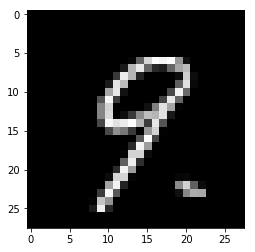

(28000, 784)


In [17]:
img = np.reshape(test[2], (28,28))
plt.imshow(img, cmap="gray")
plt.show()
print(test.shape)

In [18]:
# find test set predections
m = models["simpleNN_960x480x240x120x60x10"]["model"]
x_p = test / 255.0
p = m.predict(x_p)

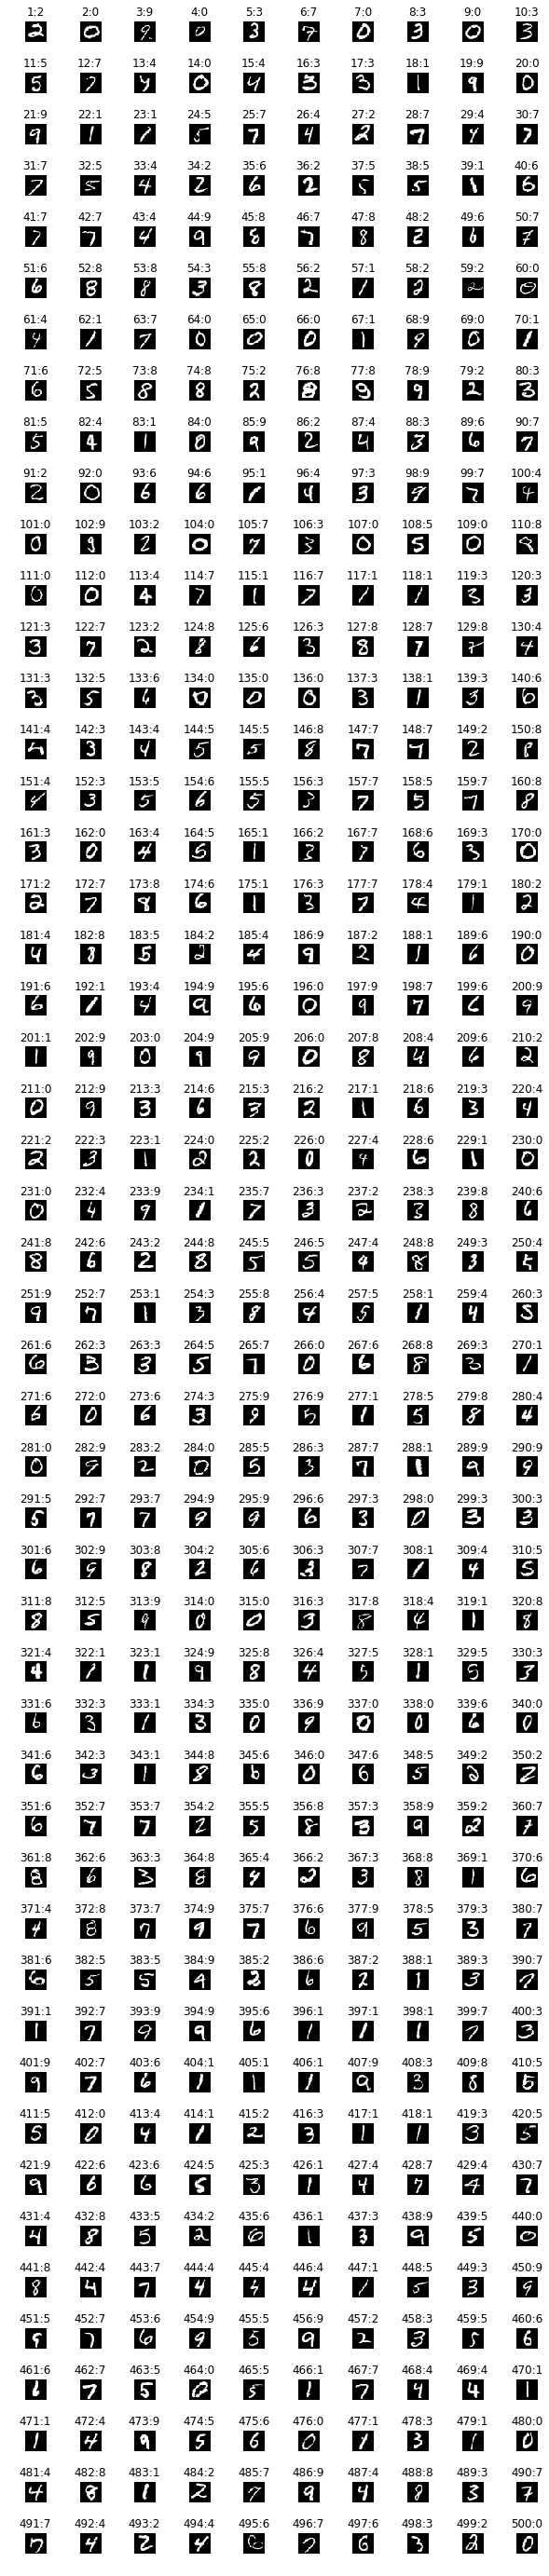

In [80]:
def show(): 
    w=10
    h=50
    fig, a = plt.subplots(ncols=10, nrows=50, figsize=(10, 50))
    plt.subplots_adjust(hspace=1.5, wspace=0.9)
    columns = 10
    rows = 50
    for ind in range(0, columns * rows):
        img = np.reshape(test[ind], (28,28))
        a.ravel()[ind].imshow(img, cmap=plt.gray())
        a.ravel()[ind].set_title(str(ind + 1) + ":" + str(np.argmax(p[ind])))
        a.ravel()[ind].set_axis_off()
show()

### custom image
The next is an image I created using paint to test my models and see what they predict:

simpleNN_12x10x8x6x4x4x10: 6
simpleNN_48x24x12x6x3x10: 3
simpleNN_24x12x8x6x4x4x10: 2
simpleNN_48x24x10: 3
simpleNN_960x480x240x120x60x10: 5
simpleNN_24x12x6x10: 5
simpleNN_480x240x120x60x10: 5
simpleNN_12x8x10: 3


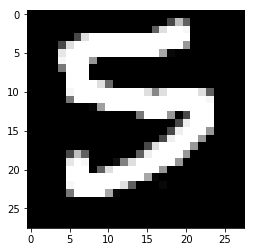

In [19]:
from PIL import Image
img_path = 'images/img_test_5.png'
img = Image.open(img_path).convert('L')
plt.imshow(img, cmap="gray")
x = image.img_to_array(img)
x_p = np.reshape(x, (1, 28 * 28)) / 255.0

for model_name in (models):
    p = models[model_name]["model"].predict(x_p)
    print(model_name + ": " +str(np.argmax(p)))


### Output predictions to csv

In [86]:
import csv
def create_submission_file(model):
    with open('./submission_files/out_simpleNN_960x480x240x120x60x10.csv', 'w') as csvfile:
        filewriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        for ind in range(0, test.shape[0]):
            filewriter.writerow([str(ind + 1), str(np.argmax(p[ind]))])
m = models["simpleNN_960x480x240x120x60x10"]["model"]
create_submission_file(m)

reference:
    https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
        